In [1]:
from mplsoccer import Pitch, VerticalPitch, Standardizer
from mplsoccer.dimensions import valid, size_varies
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

# Test polygons

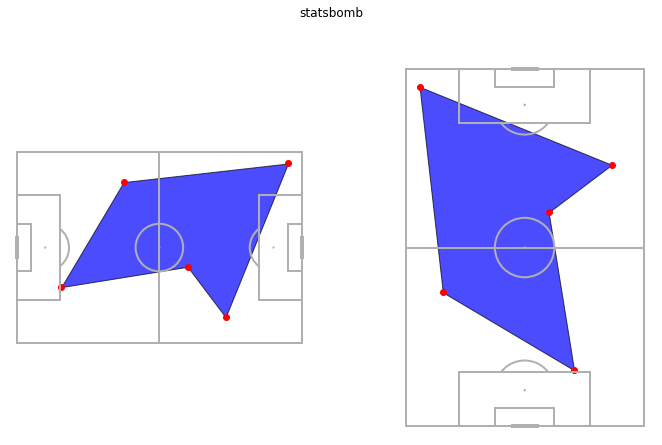

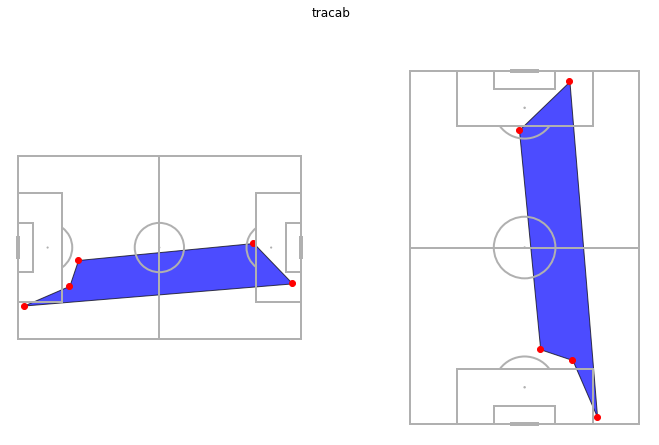

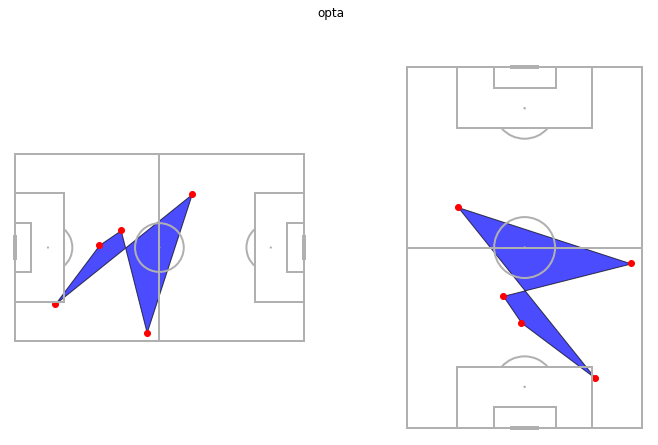

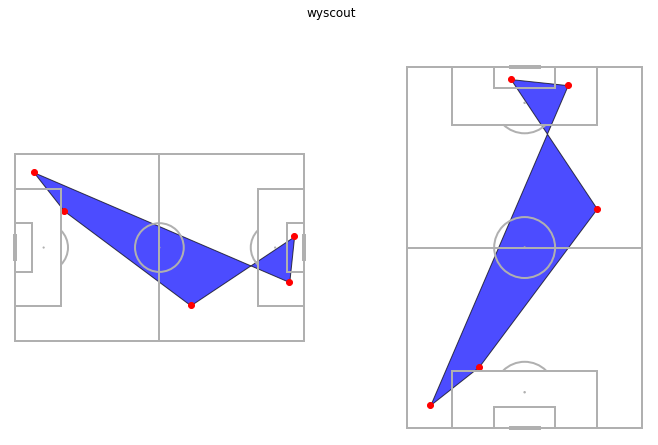

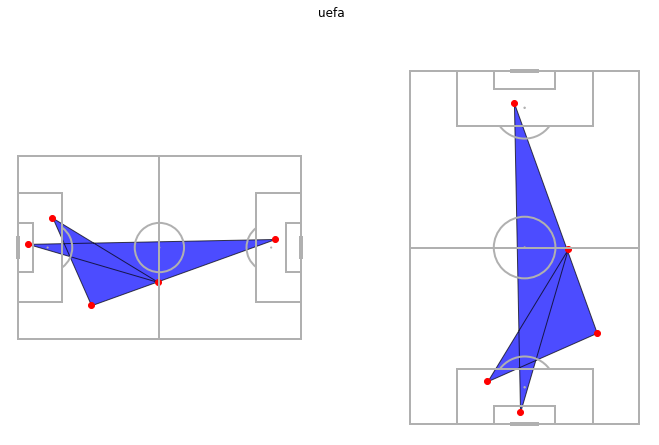

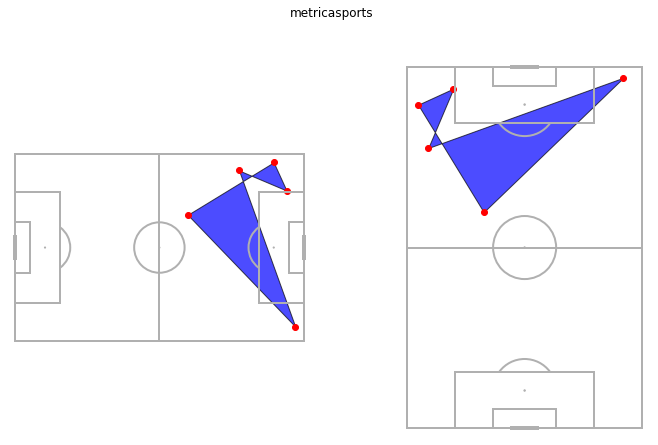

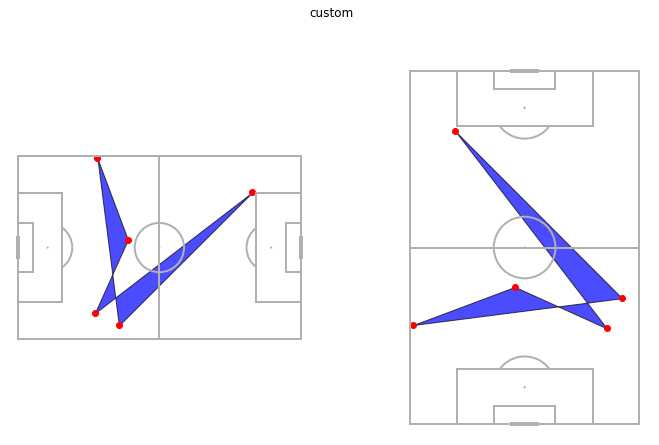

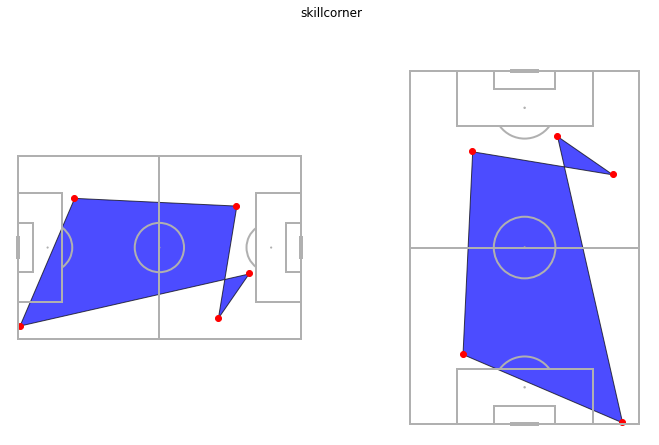

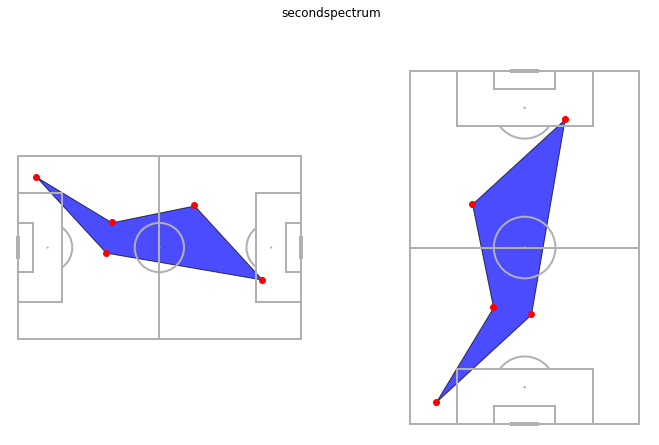

In [2]:
for pitch_type in valid:
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 7))
    fig.suptitle(pitch_type)
    
    x = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=5)
    y = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=5)
    points = np.concatenate([x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)    # polygon take a list of sequences
    #verts = np.expand_dims(points, axis=0)  # this also works instead of [points]
    verts = [points]
    pitch.draw(ax[0])
    pitch_vertical.draw(ax[1])
    
    pitch.polygon(verts, facecolors='blue', alpha=0.7, edgecolors='black', ax=ax[0])
    pitch.scatter(x, y, color='red', ax=ax[0])
    pitch_vertical.polygon(verts, facecolors='blue', alpha=0.7, edgecolors='black', ax=ax[1])
    pitch_vertical.scatter(x, y, color='red', ax=ax[1])

# Test voronoi

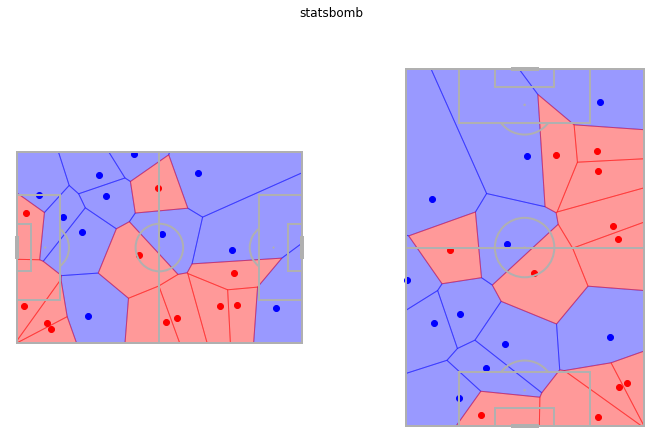

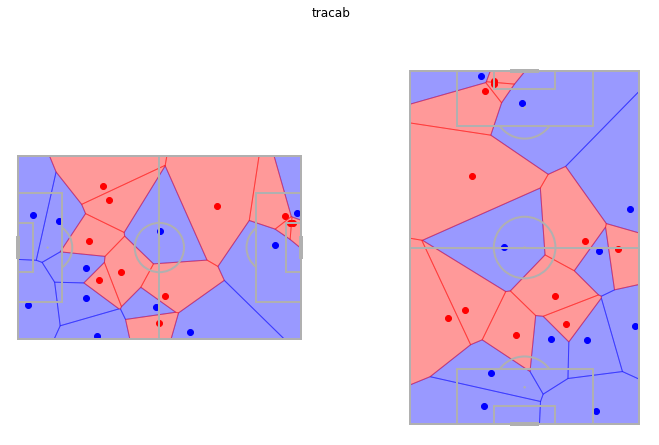

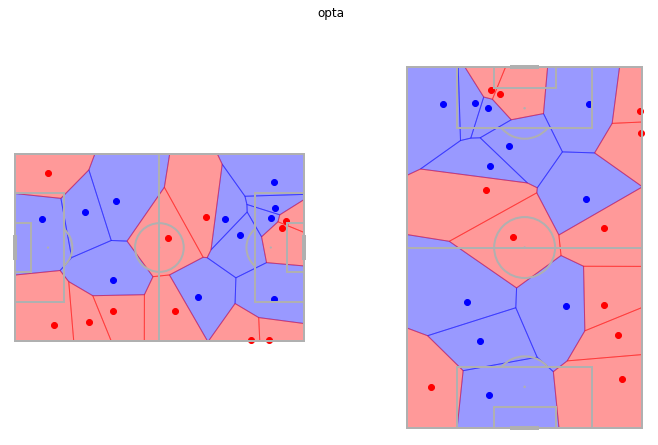

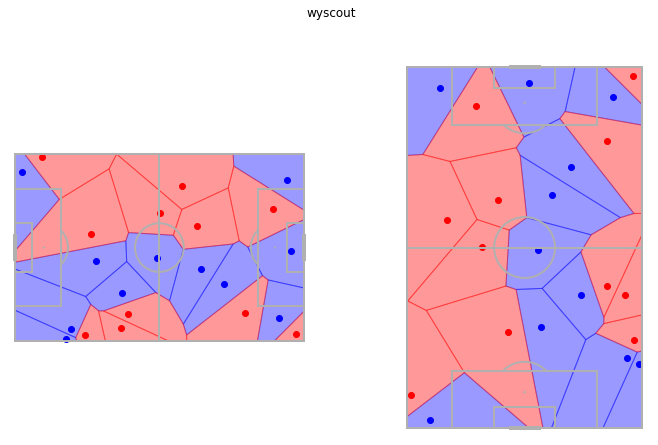

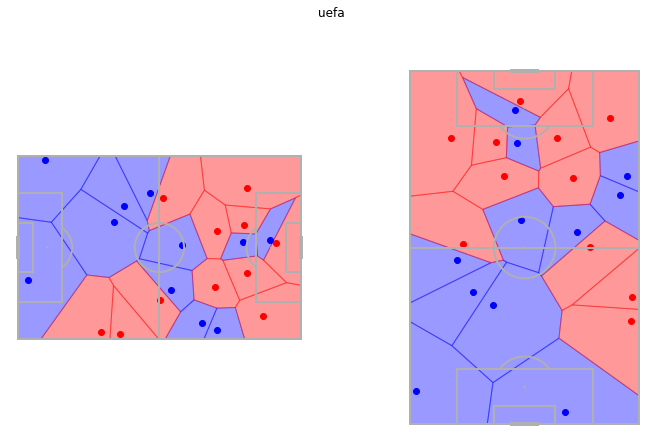

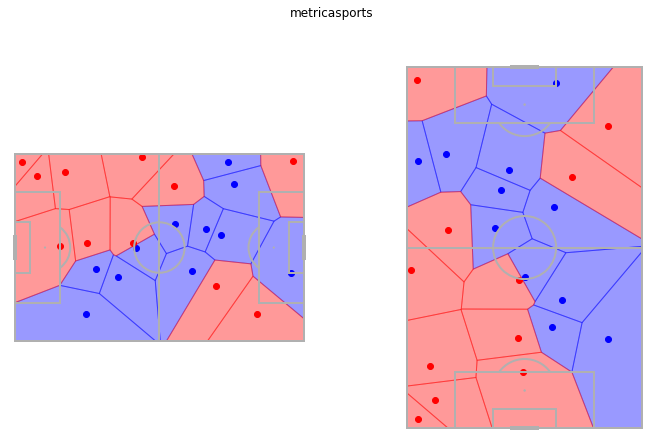

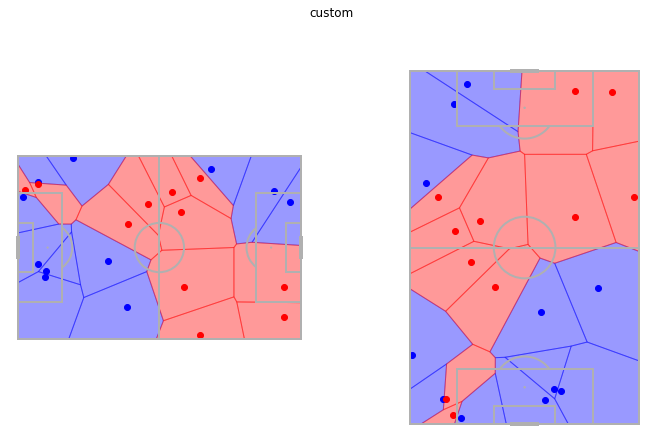

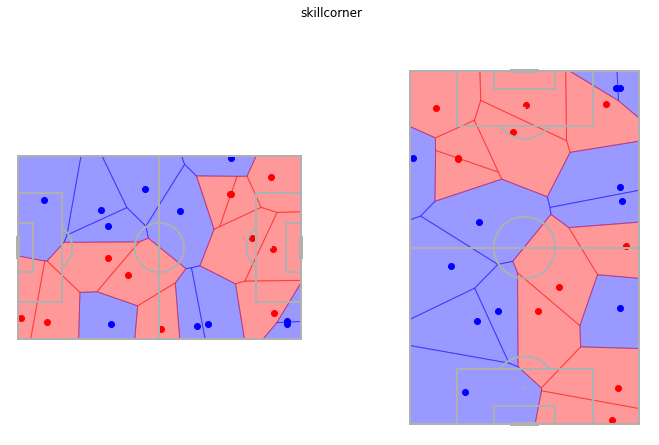

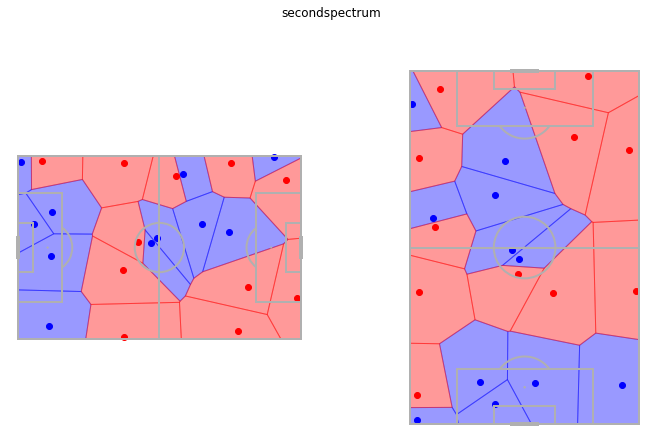

In [3]:
for pitch_type in valid:
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 7))
    fig.suptitle(pitch_type)
    
    x = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=22)
    y = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=22)
    teams = np.array([0] * 11 + [1] * 11)
    
    pitch.draw(ax=ax[0])
    pitch_vertical.draw(ax=ax[1])
    
    team1, team2 = pitch.voronoi(x, y, teams)
    pitch.polygon(team1, color='blue', alpha=0.4, ax=ax[0])
    pitch.polygon(team2, color='red', alpha=0.4, ax=ax[0])
    pitch.scatter(x[teams==1], y[teams==1], color='blue', ax=ax[0])
    pitch.scatter(x[teams==0], y[teams==0], color='red', ax=ax[0])

    
    team1_vertical, team2_vertical = pitch_vertical.voronoi(x, y, teams)
    pitch_vertical.polygon(team1_vertical, color='blue', alpha=0.4, ax=ax[1])
    pitch_vertical.polygon(team2_vertical, color='red', alpha=0.4, ax=ax[1])
    pitch_vertical.scatter(x[teams==1], y[teams==1], color='blue', ax=ax[1])
    pitch_vertical.scatter(x[teams==0], y[teams==0], color='red', ax=ax[1])

# Test voronoi standardized - shove points through voronoi at each step standardize to next pitch coordinates so get same chart for each provider.

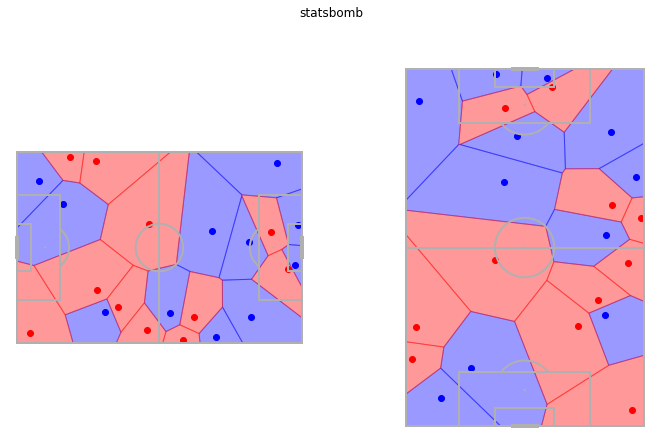

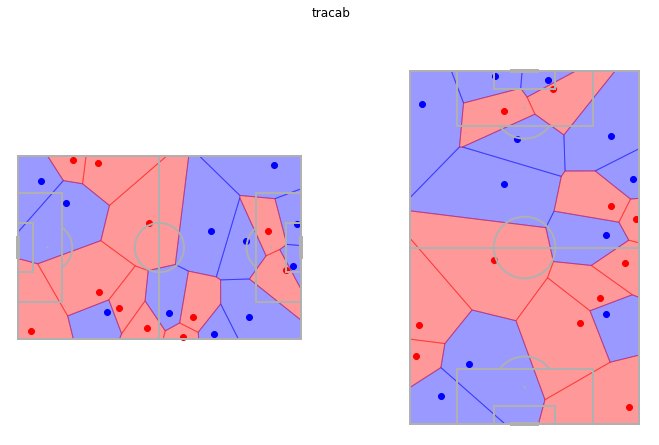

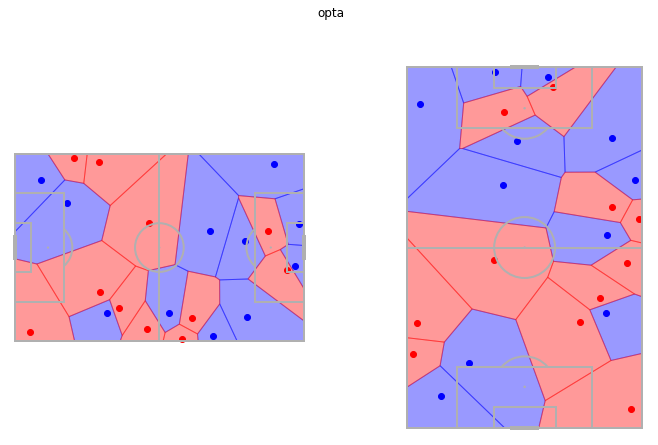

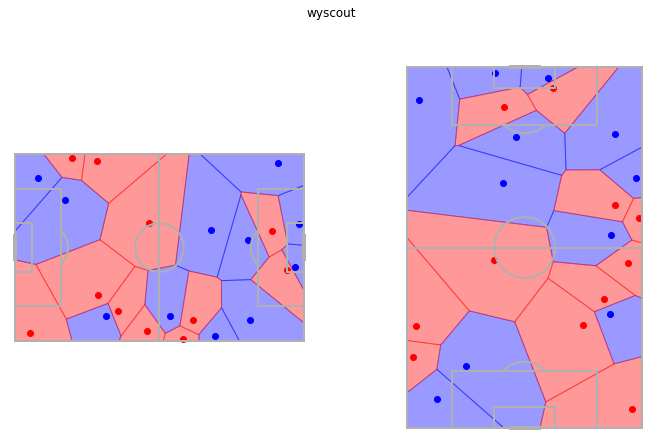

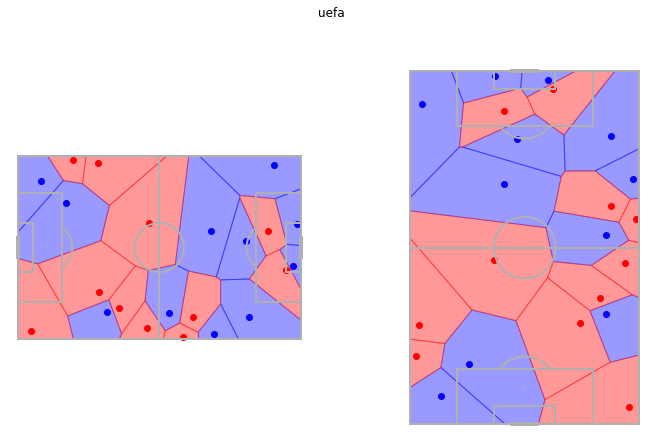

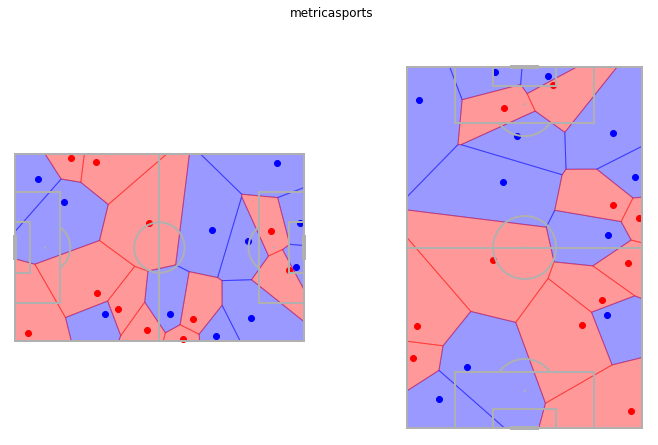

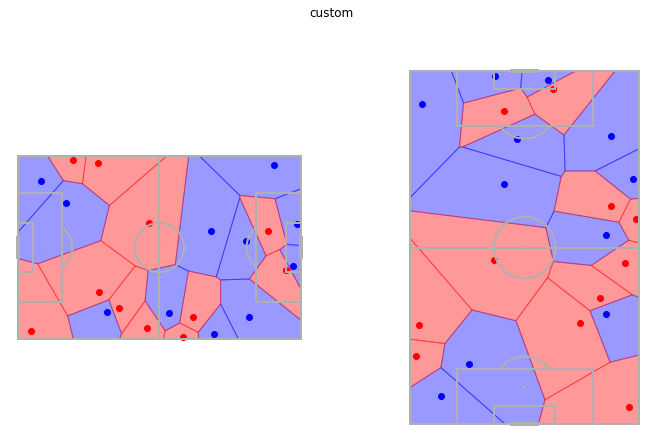

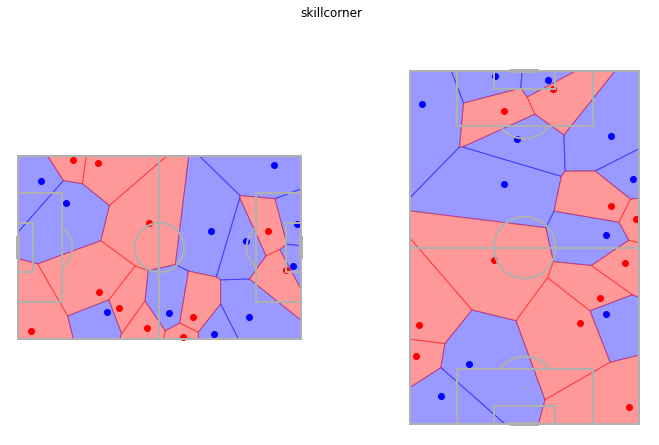

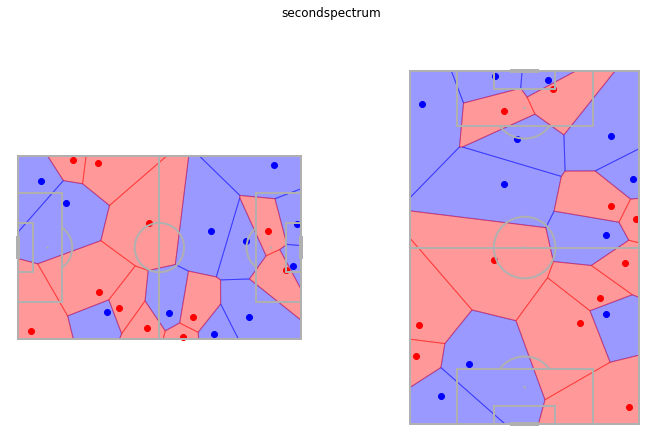

In [4]:
x = np.random.uniform(low=0, high=120, size=22)
y = np.random.uniform(low=0, high=80, size=22)
teams = np.array([0] * 11 + [1] * 11)

for idx, pitch_type in enumerate(valid):
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 7))
    fig.suptitle(pitch_type)

    pitch.draw(ax=ax[0])
    pitch_vertical.draw(ax=ax[1])
    
    team1, team2 = pitch.voronoi(x, y, teams)
    pitch.polygon(team1, color='blue', alpha=0.4, ax=ax[0])
    pitch.polygon(team2, color='red', alpha=0.4, ax=ax[0])
    pitch.scatter(x[teams==1], y[teams==1], color='blue', ax=ax[0])
    pitch.scatter(x[teams==0], y[teams==0], color='red', ax=ax[0])
    
    team1_vertical, team2_vertical = pitch_vertical.voronoi(x, y, teams)
    pitch_vertical.polygon(team1_vertical, color='blue', alpha=0.4, ax=ax[1])
    pitch_vertical.polygon(team2_vertical, color='red', alpha=0.4, ax=ax[1])
    pitch_vertical.scatter(x[teams==1], y[teams==1], color='blue', ax=ax[1])
    pitch_vertical.scatter(x[teams==0], y[teams==0], color='red', ax=ax[1])
    
    if idx < len(valid) - 2:
        standard = Standardizer(pitch_from=pitch_type, pitch_to=valid[idx+1],
                                length_to=105, width_to=68, length_from=105, width_from=68)
        x, y = standard.transform(x, y)

# Test goal angle

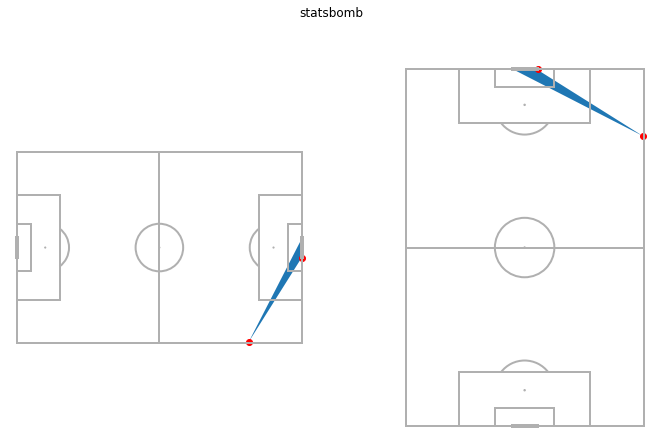

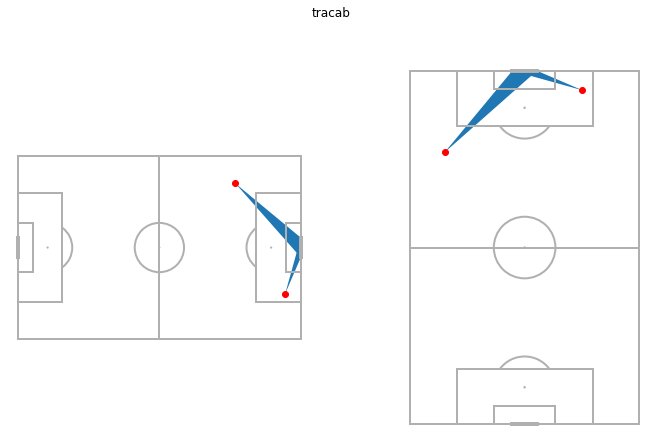

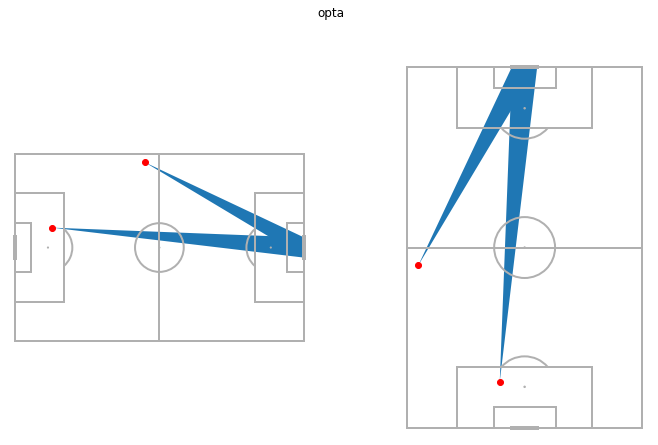

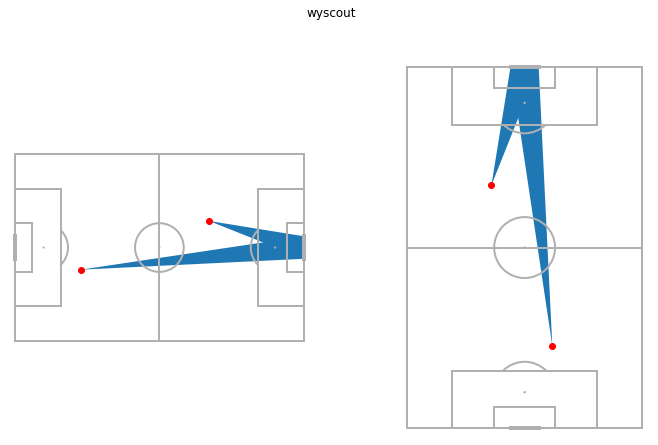

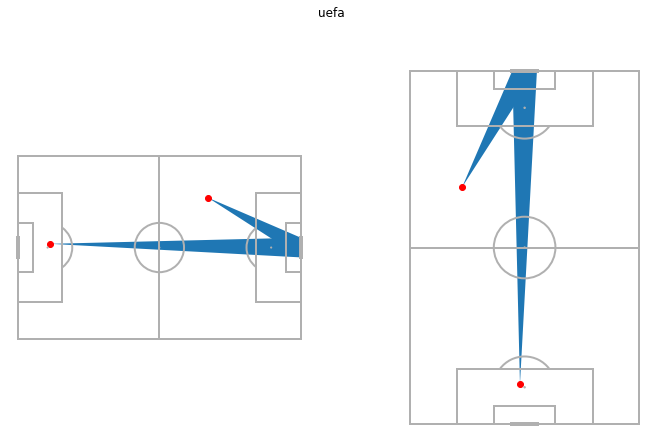

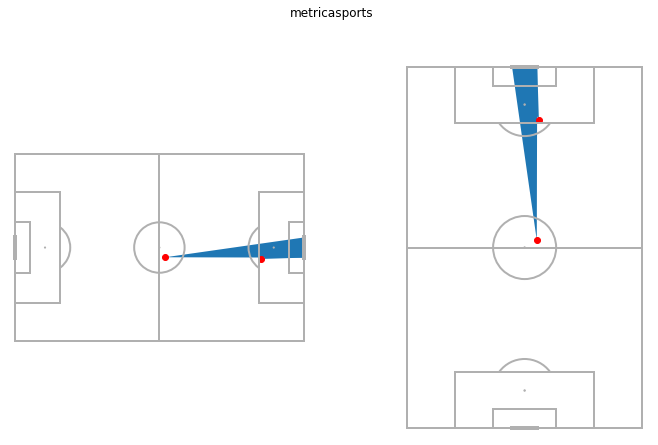

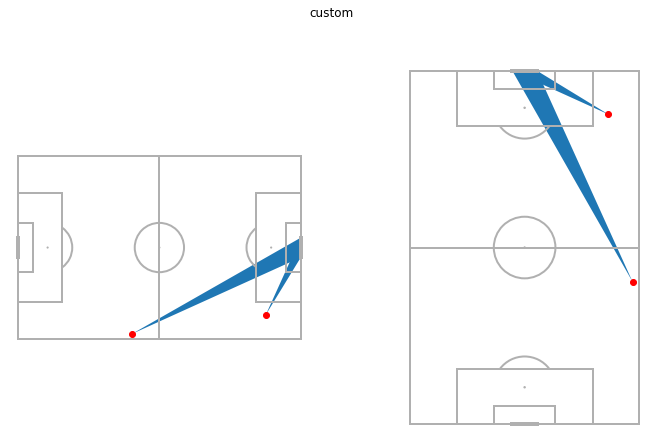

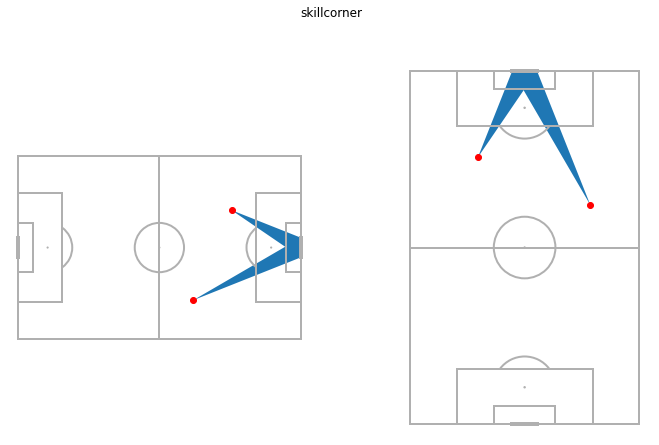

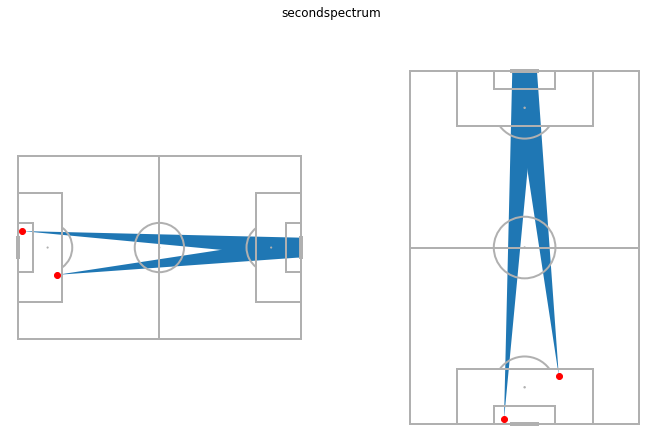

In [5]:
for pitch_type in valid:
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 7))
    fig.suptitle(pitch_type)
    
    x = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=2)
    y = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=2)

    pitch.draw(ax[0])
    pitch_vertical.draw(ax[1])
    
    pitch.goal_angle(x, y, ax=ax[0])
    pitch_vertical.goal_angle(x, y, ax=ax[1])

    
    pitch.scatter(x, y, color='red', ax=ax[0])
    pitch_vertical.scatter(x, y, color='red', ax=ax[1])

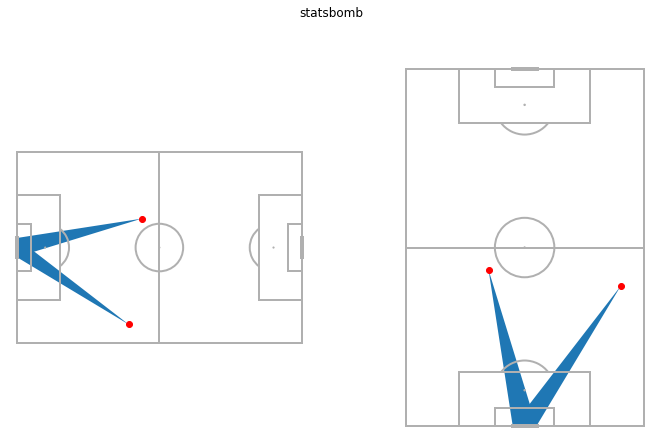

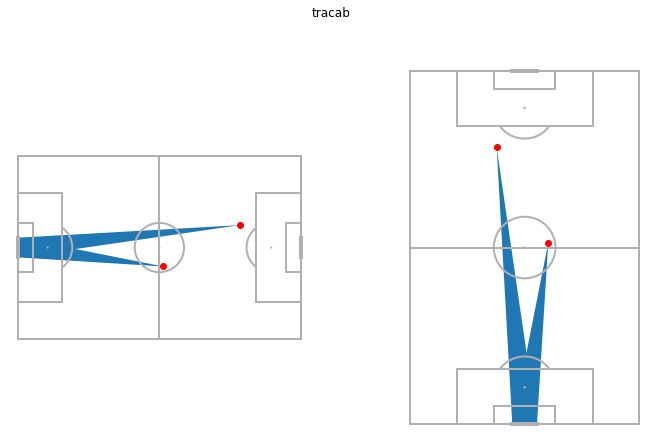

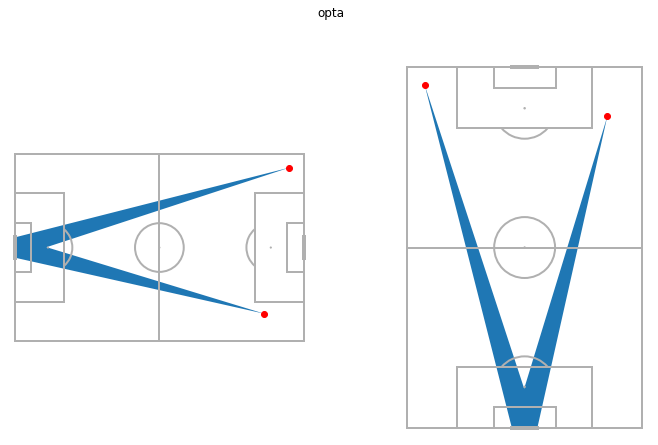

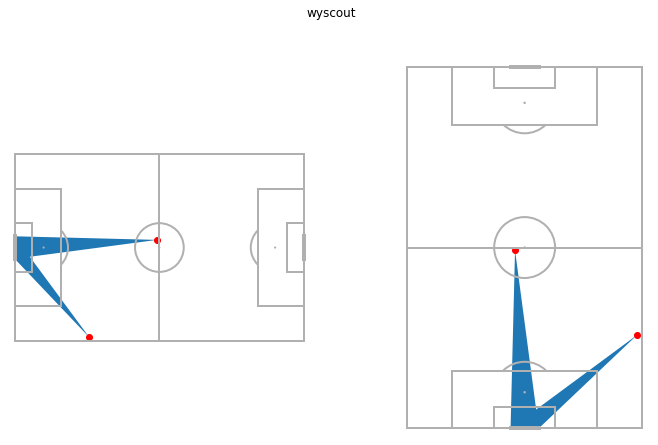

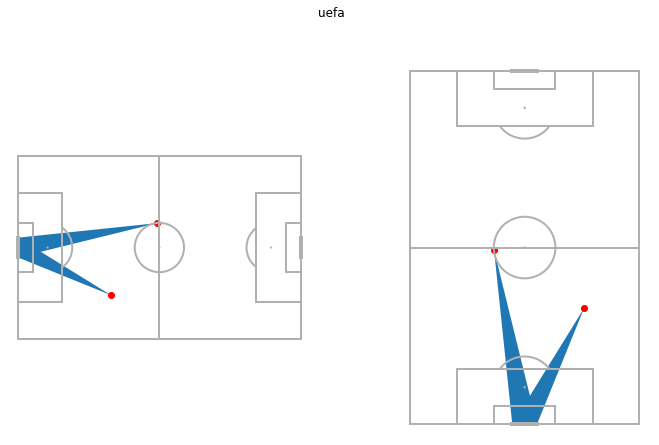

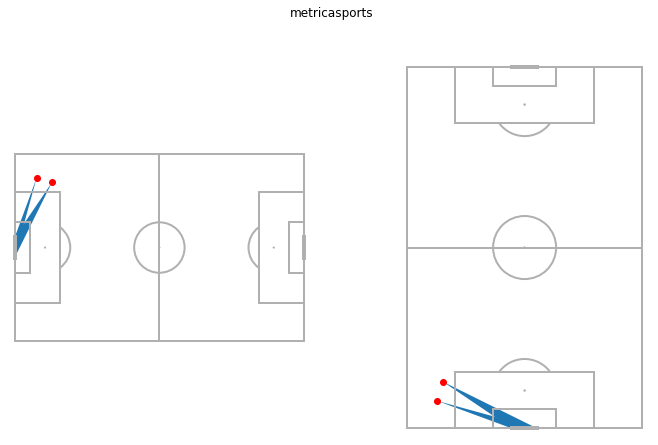

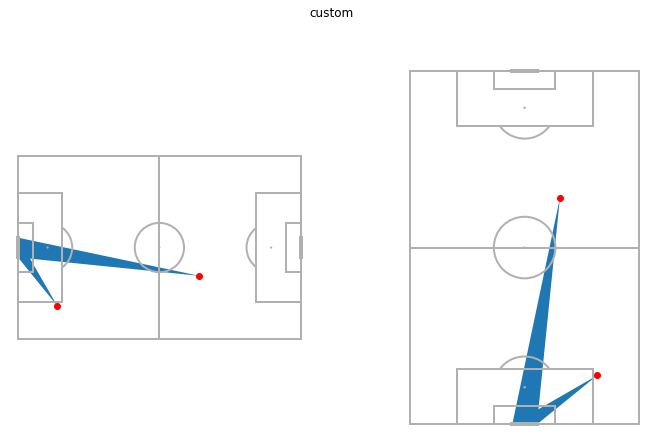

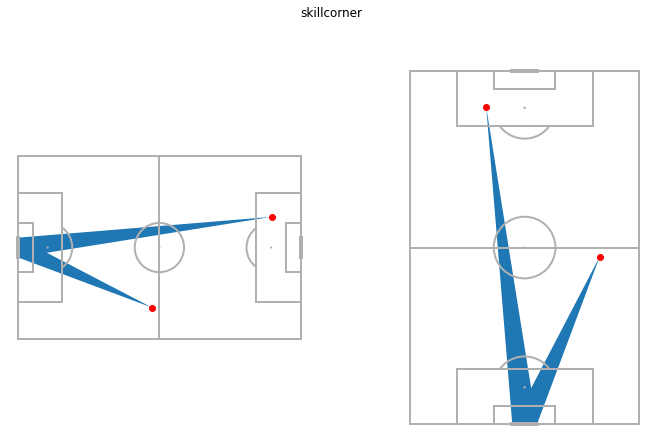

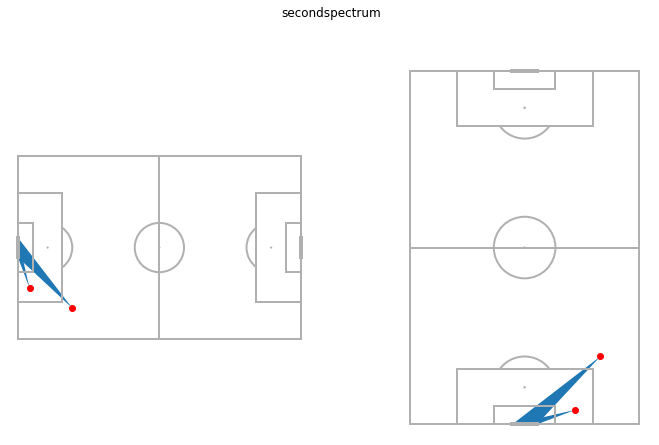

In [6]:
for pitch_type in valid:
    if pitch_type in size_varies:
        kwargs = {'pitch_length': 105, 'pitch_width': 68}
    else:
        kwargs = {}
    pitch = Pitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    pitch_vertical = VerticalPitch(pitch_type=pitch_type, line_zorder=2, **kwargs)
    fig, ax = plt.subplots(ncols=2, figsize=(12, 7))
    fig.suptitle(pitch_type)
    
    x = np.random.uniform(low=pitch.dim.pitch_extent[0], high=pitch.dim.pitch_extent[1], size=2)
    y = np.random.uniform(low=pitch.dim.pitch_extent[2], high=pitch.dim.pitch_extent[3], size=2)

    pitch.draw(ax[0])
    pitch_vertical.draw(ax[1])
    
    pitch.goal_angle(x, y, ax=ax[0], goal='left')
    pitch_vertical.goal_angle(x, y, ax=ax[1], goal='left')

    
    pitch.scatter(x, y, color='red', ax=ax[0])
    pitch_vertical.scatter(x, y, color='red', ax=ax[1])